# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

**Q1. Performing EDA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/pierce_county_house_sales.csv')
df.head(10)

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
5,2020-01-02,250000,989,336,0,0,0,1,Electric Baseboard,Frame Siding,Drywall,1,Composition Shingle,1925,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
6,2020-01-02,360000,2048,0,0,441,0,1,Forced Air,Frame Siding,Drywall,2,Composition Shingle,1998,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
7,2020-01-01,370000,1118,0,0,242,0,0,Electric Baseboard,Frame Siding,Drywall,1,Composition Shingle,1968,3,1,NaN,NaN,SEWER/SEPTIC INSTALLED
8,2020-01-02,485000,978,340,968,0,0,1,Warm and Cool Air Zone,Frame Siding,Drywall,1,Composition Shingle,1925,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
9,2020-01-02,475000,2238,0,0,436,0,1,Heat Pump,Frame Siding,Drywall,2,Composition Shingle,2019,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED


In [2]:
# quick stats
print(df.shape)
df.describe()

(16814, 19)


,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms
count,1.681400e+04,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000
mean,4.612332e+05,1879.941953,24.945878,167.852861,364.425122,38.298501,0.889021,1.558285,1980.469252,3.277983,2.317176
std,2.360833e+05,760.419008,102.066417,429.065832,286.454018,164.691471,0.596731,0.512055,33.339025,0.891240,0.827956
min,2.000000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1880.000000,0.000000,0.000000
25%,3.480000e+05,1320.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1959.000000,3.000000,2.000000
50%,4.165000e+05,1774.000000,0.000000,0.000000,420.000000,0.000000,1.000000,2.000000,1990.000000,3.000000,2.000000
75%,5.238065e+05,2352.000000,0.000000,0.000000,528.000000,0.000000,1.000000,2.000000,2006.000000,4.000000,3.000000
max,6.130000e+06,9510.000000,1212.000000,4000.000000,2816.000000,3664.000000,5.000000,3.000000,2021.000000,25.000000,8.000000


Numerical columns are in the correct format with no commas, and the sale_date column is also in the correct datetime format. Taking a closer look at the 'waterfront_type' and 'view_quality' columns since they seem to have quite a few missing values.

In [3]:
# Looking at the possible values for 'waterfront_type':
df['waterfront_type'].unique()
wft_len = len(df['waterfront_type'])
print(f'Proportion of Missing Values: {df["waterfront_type"].isna().sum() / wft_len}')

view_qual = len(df['view_quality'])
print(f'Proportion of Missing Values: {df["view_quality"].isna().sum() / view_qual}')

Proportion of Missing Values: 0.9671107410491258
Proportion of Missing Values: 0.9453431664089449


Since around 95% of the data is missing for both 'waterfront_type' and 'view_quality', I will drop both columns since its too large of a cavity to just drop records with missing values.

In [4]:
# Dropping both 'waterfront_type' and 'view_quality':
clean_df = df.drop(['view_quality', 'waterfront_type'], axis=1)
clean_df.head(10)

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,SEWER/SEPTIC INSTALLED
5,2020-01-02,250000,989,336,0,0,0,1,Electric Baseboard,Frame Siding,Drywall,1,Composition Shingle,1925,2,1,SEWER/SEPTIC INSTALLED
6,2020-01-02,360000,2048,0,0,441,0,1,Forced Air,Frame Siding,Drywall,2,Composition Shingle,1998,4,3,SEWER/SEPTIC INSTALLED
7,2020-01-01,370000,1118,0,0,242,0,0,Electric Baseboard,Frame Siding,Drywall,1,Composition Shingle,1968,3,1,SEWER/SEPTIC INSTALLED
8,2020-01-02,485000,978,340,968,0,0,1,Warm and Cool Air Zone,Frame Siding,Drywall,1,Composition Shingle,1925,3,2,SEWER/SEPTIC INSTALLED
9,2020-01-02,475000,2238,0,0,436,0,1,Heat Pump,Frame Siding,Drywall,2,Composition Shingle,2019,3,3,SEWER/SEPTIC INSTALLED


/var/folders/f0/rhgwtvsd01lfbqlqp_ts85wh0000gn/T/ipykernel_17492/3554323791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


<Axes: >

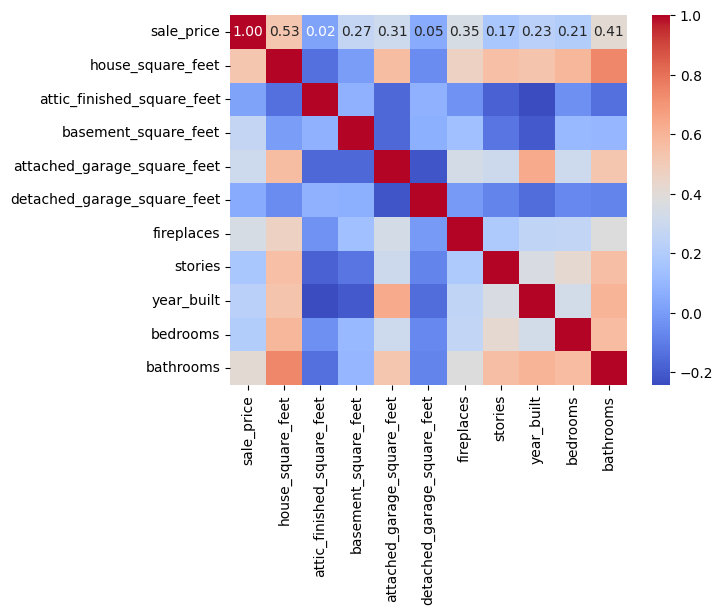

In [5]:
# Heatmap to show the correlations between all variables in the df:
sns.heatmap(clean_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

<Axes: xlabel='house_square_feet', ylabel='sale_price'>

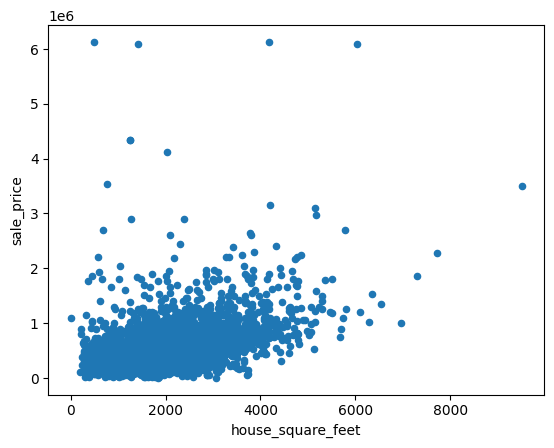

In [6]:
# Scatterplots: comparing sale_price by house_square_feet
clean_df.plot.scatter(x='house_square_feet', y='sale_price')

<Axes: >

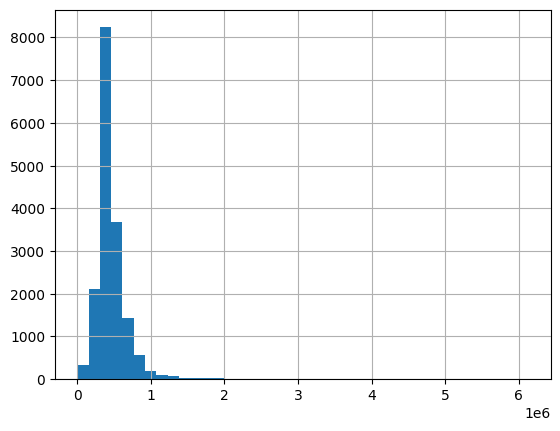

In [7]:
clean_df['sale_price'].hist(bins=40)

**Q2: Transform categorical variables for regression**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# finding all categorical columns and setting them to var
categorical_cols = ['hvac_description', 'exterior', 'interior', 'roof_cover', 'utility_sewer']
# one-hot encoding:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(df[categorical_cols])
# converting the encoded features to df:
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# dropping the original categorical columns and adding the one-hot encoded transformed ones back
transformed_cl_df = clean_df.drop(columns=categorical_cols).reset_index(drop=True)
transformed_cl_df = pd.concat([transformed_cl_df, encoded_df], axis=1)

**Q3: 80/20 Train/Test Split**

In [10]:
# dropping 'sale_date' - causing a lot of problems with regression
transformed_cl_df = transformed_cl_df.drop(['sale_date'], axis=1)

In [11]:
#setting target var as 'sale_price' since that's that
target = 'sale_price'
features = transformed_cl_df.drop(columns=[target])


# splitting data:
X_train, X_test, y_train, y_test = train_test_split(features, transformed_cl_df[target], test_size=0.2, random_state=42)

**Q4: Implementing Linear Model**

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)

#Predictions:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# evaluating model performance:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}, R^2: {r2_train}")
print(f"Testing RMSE: {rmse_test}, R^2: {r2_test}")

Training RMSE: 173199.63228460564, R^2: 0.4357204328125325
Testing RMSE: 201414.94115103004, R^2: 0.38537308433336237


**Q5. Making Partial Correlation Plots**

/Users/yuthimadireddy/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:566: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout()


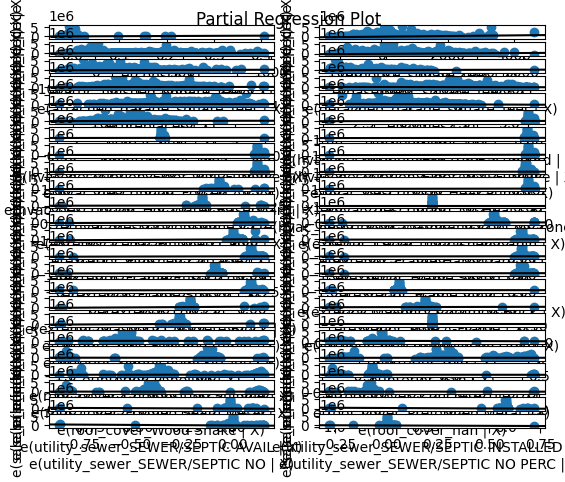

In [22]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_with_const).fit()
#fig = sm.graphics.plot_partregress_grid(model)
#plt.show()

from statsmodels.graphics.regressionplots import plot_partregress_grid
#fig = plot_partregress_grid(model)
#plt.show()

**Q6 - Creating a more complex model**

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)

X_test_poly = poly.transform(X_test)

#fitting model with more complex/poly features:
lm_complex = LinearRegression()
lm_complex.fit(X_train_poly, y_train)

# create predictions for poly:
y_train_pred_complex = lm_complex.predict(X_train_poly)
y_test_pred_complex = lm_complex.predict(X_test_poly)

# Performance evaluation:
rmse_train_complex = np.sqrt(mean_squared_error(y_train, y_train_pred_complex))
rmse_test_complex = np.sqrt(mean_squared_error(y_test, y_test_pred_complex))
r2_train_complex = r2_score(y_train, y_train_pred_complex)
r2_test_complex = r2_score(y_test, y_test_pred_complex)

print(f'Complex Model - RMSE (Train): {rmse_train_complex}, RMSE (Test): {rmse_test_complex}')
print(f'Complex Model - R^2 (Train): {r2_train_complex}, R^2 (Test): {r2_test_complex}')

Complex Model - RMSE (Train): 154124.0263958807, RMSE (Test): 1112057.7120215977
Complex Model - R^2 (Train): 0.5531712739237997, R^2 (Test): -17.73625807626368


The R^2 value was actually higher on the more complex model compared to the original model. The polynomial model had an R^2 value of 0.55 whereas the original had a value of 0.44. That being said, the R^2 test value for complex model was -17.73 which suggests something definitely did not go right or the model is just severely underfitting the data. This is different from what I expected, as I thought a more complex model would be too focused on capturing the different features and their relationships, causing the model to overfit more compared to the original. I believe something was not accounted for when I was transforming the variables through the one-hot encoding technique.